In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [75]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [76]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [77]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [78]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [79]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [80]:
species_observation = pd.merge(observations, species, how="left", on="scientific_name")

In [81]:
species_observation.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


In [82]:
species_observation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


The merged dataframe cotains 25'632 entries with 6 columns (5 objects, 1 int64).

- `scientific_name`: 5'541 unique elements in the dataframe
- `park_name`:  4 unique elements
- `observations`: The dataframes counts 3'645'245 observations of species in total.
- `category` 7 unique elements
- `common_names`: 5'504 unique elements
- `conservation_status`: 4

Checking for NA's showed, that there are 24'752 NA's for the variabel `conservation_status`. We are going to fill the NA's wit the status "Unknown"

In [83]:
species_observation["conservation_status"] = species_observation["conservation_status"].fillna("Unknown")

In [84]:
print(species_observation.park_name.value_counts())

Great Smoky Mountains National Park    6408
Yosemite National Park                 6408
Bryce National Park                    6408
Yellowstone National Park              6408
Name: park_name, dtype: int64


In [85]:
#create sample Dataframe
species_categories =species_observation.category.value_counts(normalize=True).to_frame()
species_categories = species_categories.rename_axis("Species").reset_index().rename(columns={"category": "percentage"})

#calculate the percentage of each category
species_categories.percentage = species_categories.percentage*100


print(species_categories)

             Species  percentage
0     Vascular Plant   76.310861
1               Bird    9.222846
2  Nonvascular Plant    5.196629
3             Mammal    4.681648
4               Fish    2.044320
5          Amphibian    1.279650
6            Reptile    1.264045


In [98]:
#Filter Vascular Plant got get value_counts for animals
species_categories_animals = species_observation[species_observation.category != "Vascular Plant"].category.value_counts(normalize=True).to_frame().reset_index()

#rename columns
species_categories_animals = species_categories_animals.rename(columns={"index": "Species", "category": "percentage"})

species_categories_animals.percentage = species_categories_animals.percentage*100




print(species_categories_animals)

             Species  percentage
0               Bird   38.932806
1  Nonvascular Plant   21.936759
2             Mammal   19.762846
3               Fish    8.629776
4          Amphibian    5.401845
5            Reptile    5.335968


In [87]:
print(species_observation.conservation_status.value_counts())

Unknown               24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64


### Species


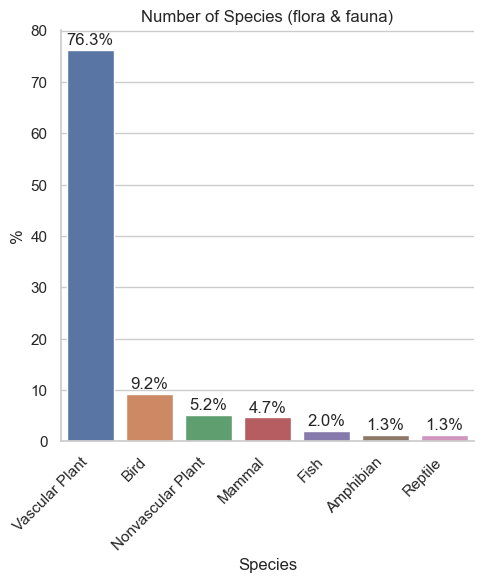

In [99]:
plot = sns.catplot(data=species_categories, x="Species", y="percentage", kind="bar")
plt.title("Number of Species (flora & fauna)")
#rotate the x-axis
plot.ax.set_xticklabels(species_categories["Species"], rotation=45, ha="right")
#set the y-axis label to %
plot.set(ylabel="%")

#display the values above each bar
for index, row in species_categories.iterrows():
    plot.ax.text(x=index, y=row["percentage"]+1, s=f"{row['percentage']:.1f}%", ha="center")

plt.show()
plt.close()


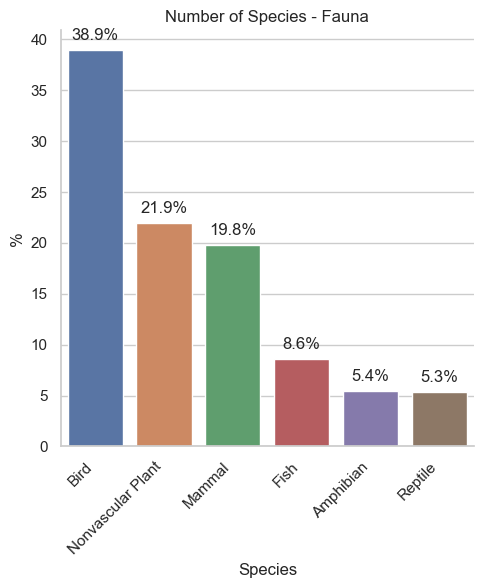

In [103]:
plot = sns.catplot(data=species_categories_animals, x="Species", y="percentage", kind="bar")

#rotate the x-axis
plot.ax.set_xticklabels(species_categories_animals["Species"], rotation=45, ha="right")
plt.title("Number of Species - Fauna")
# set the y-axis label to %
plot.set(ylabel="%")

#display the values above each bar
for index, row in species_categories_animals.iterrows():
    plot.ax.text(x=index, y=row["percentage"]+1,s=f"{row['percentage']:.1f}%", ha="center")


plt.show()
plt.close()